# Alpha Ratio method for W+jet estimation (NEW)

> In this notebook I grabed the corrected W+jets from histogram but since this histogram was not contaning the scale to I need to scale it but the scaling method also scales the error bars.

In [1]:
import ROOT as r

r.gSystem.Load("PDFs/PdfDiagonalizer_cc.so")
r.gSystem.Load("PDFs/Util_cxx.so")
r.gSystem.Load("PDFs/HWWLVJRooPdfs_cxx.so")

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

%matplotlib inline

Welcome to JupyROOT 6.08/05


In [2]:
fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_2018_01_25_14h36/Hadds_for_BkgEstimation/WWTree_WJets.root")

treeIn = fin.Get("otree")

## Get W+jet histogram in signal and side-band region

In [3]:
hSignal = r.TH1D("hSignal","",4,170,2502)

hSideBand = r.TH1D("hSideBand","",4,170,2502)


cutString_SideBand =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>40 && PuppiAK8_jet_mass_so<65) || (PuppiAK8_jet_mass_so>105 && PuppiAK8_jet_mass_so<150)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"

cutString_Signal =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>65) && (PuppiAK8_jet_mass_so<105)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"


treeIn.Draw("mass_lvj_type0>>hSideBand",cutString_SideBand)
treeIn.Draw("mass_lvj_type0>>hSignal",cutString_Signal)


10033L

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


## Calculate alpha by dividing W+jets MC in signal and side-band region

Alpha does not exists


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


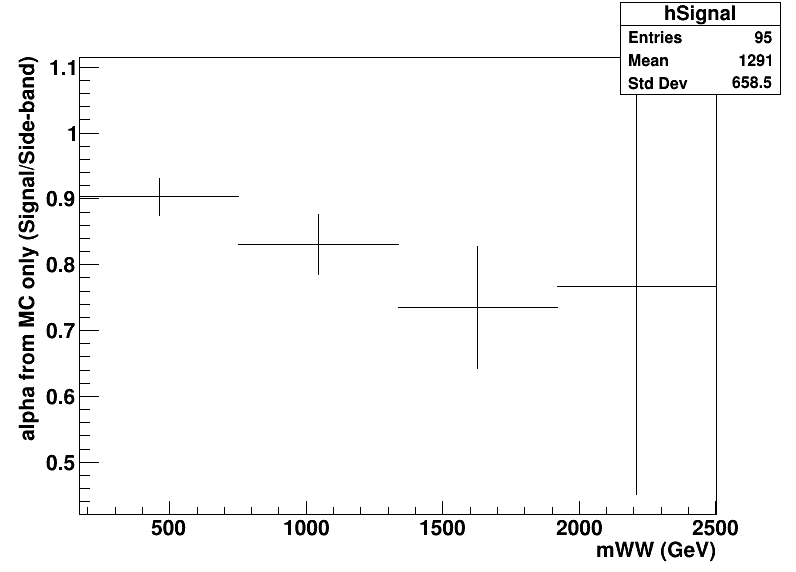

In [4]:
try: 
    Alpha.Delete();
except: 
    print "Alpha does not exists";
    
Alpha =  r.TH1D("Alpha","",4,0,2502)
Alpha = hSignal.Clone()
Alpha.Divide(hSideBand)
c1 = r.TCanvas("c1", "canvas", 800, 600)
Alpha.GetXaxis().SetTitle("mWW (GeV)")
Alpha.GetYaxis().SetTitle("alpha from MC only (Signal/Side-band)")
Alpha.Draw()
#Alpha.Fit("expo")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


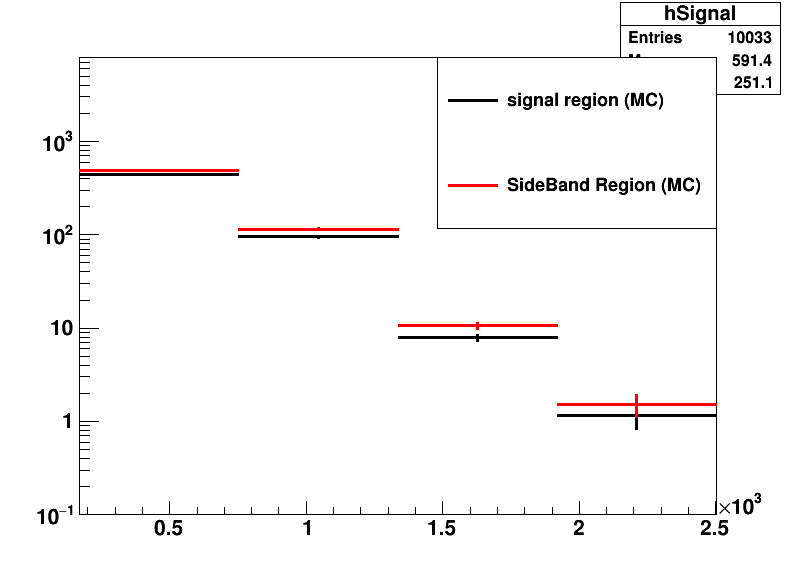

In [25]:
c = r.TCanvas("c", "canvas", 800, 600)
c.cd()
hSignal.SetMarkerColor(1)
hSignal.SetLineColor(1)
hSignal.SetLineWidth(3)
hSignal.SetMarkerSize(5)
hSideBand.SetMarkerColor(2)
hSideBand.SetLineColor(2)
hSideBand.SetLineWidth(3)
hSideBand.SetMarkerSize(5)

r.TGaxis.SetMaxDigits(3)

leg = r.TLegend(0.55,0.9,.9,0.6)
leg.AddEntry(hSignal,"signal region (MC)")
leg.AddEntry(hSideBand,"SideBand Region (MC)")

hSignal.SetMaximum(8000.)
hSignal.SetMinimum(.1)

hSignal.Draw()
#hSignal.Fit("gausn(0)")
hSideBand.Draw("same")
leg.Draw()
c.SetLogy()
c.Draw()

# Get corrected W+jet in sideband region after fit to data

This histogram is saved in ExoVV fitter using create histogram method:

https://github.com/ram1123/EXOVVFitter/blob/master/g1_exo_doFit_class_new.py#L1795-L1796

But, this histogram was not taking the normalization so I have to scale it with the normalization. ***But, scaling the histogram also scaling the errors.***

451.710479736
40.2695617676
7.32409906387
2.67882800102


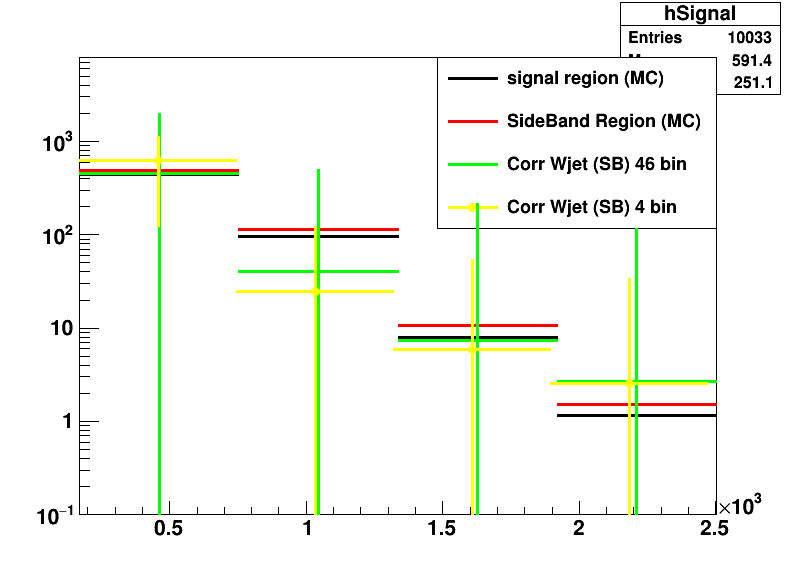

In [26]:
Wjet_file = r.TFile.Open("wjetmodel_Ex__WJets0_xww__sb_lo_auto.root")
Wjet_hist = r.TH1F()
Wjet_hist.Sumw2()
Wjet_hist = Wjet_file.Get("rrv_mass_lvj__rrv_mass_lvj")
Wjet_hist.Scale(501.911)

newHist = r.TH1F("newHist","",4,170,2502)
newHist.Sumw2()
newHist.SetMarkerColor(3)
newHist.SetLineColor(3)
newHist.SetLineWidth(3)
newHist.SetMarkerSize(1)
binVal = [0]*5
binError = [0]*5
count=0
for i in range(1,47):
    if i%12 ==1:
        count+=1
    binVal[count] += Wjet_hist.GetBinContent(i)
    binError[count] += Wjet_hist.GetBinError(i)
    #print i,count,Wjet_hist_auto.GetBinContent(i),Wjet_hist_auto.GetBinLowEdge(i)

for i in range(1,5):
    newHist.SetBinContent(i,binVal[i])
    newHist.SetBinError(i,binError[i])

newHist.Draw("same")
leg.AddEntry(newHist,"Corr Wjet (SB) 46 bin")

print newHist.GetBinContent(1)
print newHist.GetBinContent(2)
print newHist.GetBinContent(3)
print newHist.GetBinContent(4)

Wjet_file4 = r.TFile.Open("wjetmodel_Ex__WJets0_xww__sb_lo_4bin.root")
Wjet_hist4 = Wjet_file4.Get("model_pdf_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
Wjet_hist4.Scale(401.911)

Wjet_hist4.SetMarkerColor(5)
Wjet_hist4.SetLineColor(5)
Wjet_hist4.SetLineWidth(3)
Wjet_hist4.SetMarkerSize(1)
Wjet_hist4.Draw("same")
leg.AddEntry(Wjet_hist4,"Corr Wjet (SB) 4 bin")


# print "=> ",Wjet_hist.GetBinLowEdge(1),Wjet_hist.GetBinWidth(1)+Wjet_hist.GetBinLowEdge(1),Wjet_hist.GetBinWidth(1)
# print "=> ",Wjet_hist.GetBinLowEdge(2),Wjet_hist.GetBinWidth(2)+Wjet_hist.GetBinLowEdge(2),Wjet_hist.GetBinWidth(2)
# print "=> ",Wjet_hist.GetBinLowEdge(3),Wjet_hist.GetBinWidth(3)+Wjet_hist.GetBinLowEdge(3),Wjet_hist.GetBinWidth(3)
# print "=> ",Wjet_hist.GetBinLowEdge(4),Wjet_hist.GetBinWidth(4)+Wjet_hist.GetBinLowEdge(4),Wjet_hist.GetBinWidth(4)




c.Draw()

# Multiplication by Alpha to get Signal Region W+jets obtained from data.

In [ ]:
hModel_Sig = r.TH1F("hModel_Sig","",4,170,2502)
hModel_Sig.Sumw2()
hModel_Sig.SetMarkerColor(4)
hModel_Sig.SetLineColor(4)
hModel_Sig.SetLineWidth(3)
hModel_Sig.SetMarkerSize(5)

hModel_Sig.SetBinContent(1,newHist.GetBinContent(1)*Alpha.GetBinContent(1))
hModel_Sig.SetBinContent(2,newHist.GetBinContent(2)*Alpha.GetBinContent(2))
hModel_Sig.SetBinContent(3,newHist.GetBinContent(3)*Alpha.GetBinContent(3))
hModel_Sig.SetBinContent(4,newHist.GetBinContent(4)*Alpha.GetBinContent(4))

hModel_Sig.Draw("same")

leg.AddEntry(hModel_Sig,"W+jet Signal Region (Alpha)")


c.Draw()